# Customer Segmentation and Revenue Prediction using RFM Analysis 
# (Online Retail Dataset)

#### Objective : *To analyze customer purchasing behavior from a UK-based online retail dataset, segment customers for targeted marketing, and predict potential revenue using regression.*

Deliverables:

- 5 business-friendly customer segments using KMeans
  
- Segment-wise marketing insights

- Revenue prediction using linear regression

In [1]:
import pandas as pd
import numpy as np

# Load and Explore the Dataset

Started by loading the Online Retail dataset, which contains transaction records for a UK-based e-commerce retailer. The first step was to explore the basic structure, inspecting the columns, datatypes, and the initial few rows to understand what kind of data we are dealing with.

Found variables like `InvoiceNo`, `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerID`, and `Country`. This helped to identify that the dataset involved customer purchases, useful for analyzing behavior and value. Cancelled transactions are also mentioned in the dataset starting with 'C' with the InvoiceNo

In [171]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [172]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [173]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [174]:
df.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [175]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [176]:
df[df['InvoiceNo'].str.contains('C', na=False, case = False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


# Data Cleaning

As common with real-world datasets, this one needed cleaning. Began by checking missing values and found several rows with missing CustomerID, which are essential for behavior tracking so they were removed.

Also eliminated duplicates and filtered out transactions with negative or zero `Quantity` and `UnitPrice`, as they don't reflect actual purchases. This process ensured that the dataset was reliable for both customer segmentation and revenue analysis.

In [177]:
# drop null customer ids
df = df[df['CustomerID'].notnull()]

# remove cancelled orders
df = df[~df['InvoiceNo'].str.contains('C',case = False, na=False)]

# remove negative quantity and negcative nitprice
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

# calculate total price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# convert to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [178]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [179]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [180]:
print(f"Dataset shape aftr cleaning: {df.shape}")
df.describe()

Dataset shape aftr cleaning: (397884, 9)


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


<Axes: title={'center': 'Top Countries by Unique Customers'}, xlabel='Country'>

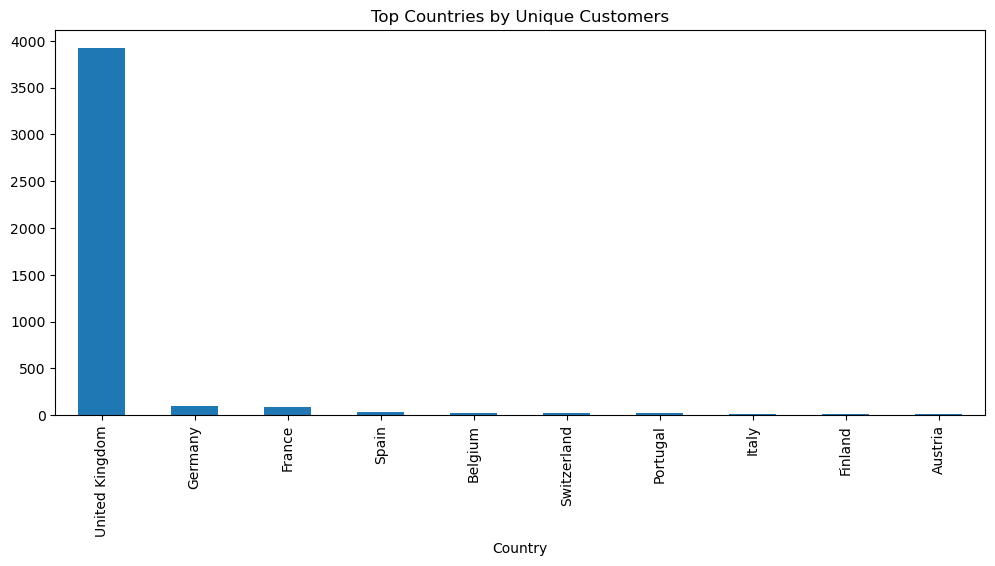

In [181]:
country_counts = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

country_counts[:10].plot(kind='bar', figsize=(12, 5), title="Top Countries by Unique Customers")

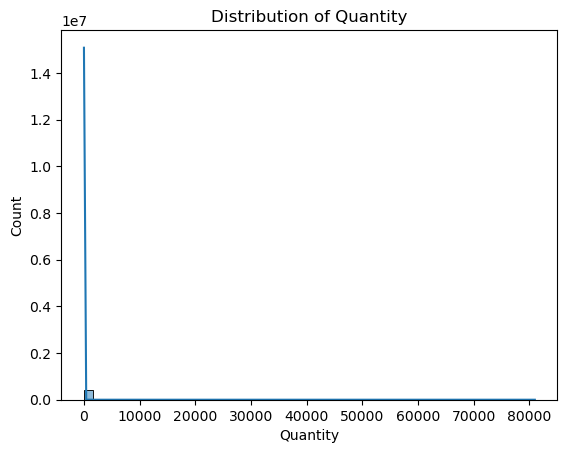

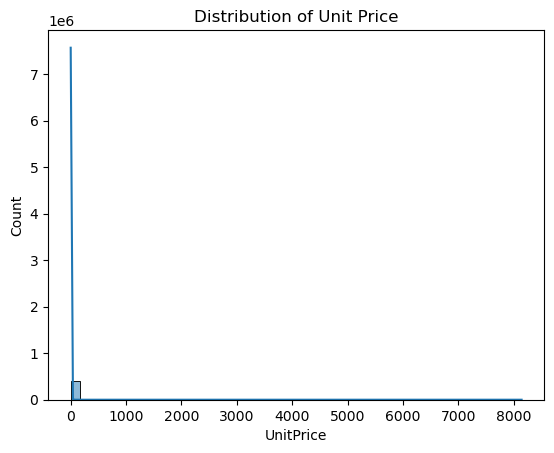

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title("Distribution of Quantity")
plt.show()

sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title("Distribution of Unit Price")
plt.show()


Text(0.5, 0, 'Quantity')

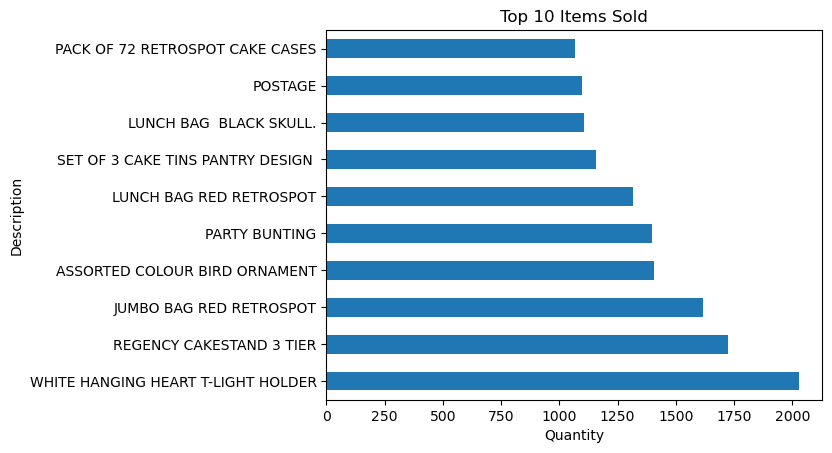

In [183]:
#  most frequent item sold
top_items = df['Description'].value_counts().head(10)
top_items.plot(kind ='barh', title='Top 10 Items Sold')
plt.xlabel("Quantity")

# Feature Engineering (RFM + Behavioral Features)

To analyze customer behavior, I used the RFM model:

Recency: How recently a customer made a purchase

Frequency: How often they purchased

Monetary: How much money they spent

I grouped the data by `CustomerID` and computed these metrics. This transformation turned raw transactional data into a meaningful customer-level dataset. I also created RFM scores by assigning quantile-based ranks to each metric, which allowed me to compare customers consistently.

In [184]:
import datetime as dt

# set a reference point one day after the last invoice date.
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({'InvoiceDate' : lambda x: (snapshot_date - x.max()).days,
                                  'InvoiceNo' : 'nunique',
                                  'TotalPrice' : 'sum'}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


Recency: Days since the last purchase for each customer.

Frequency: Number of unique purchases (invoices) per customer.

Monetary: Total amount spent by each customer.

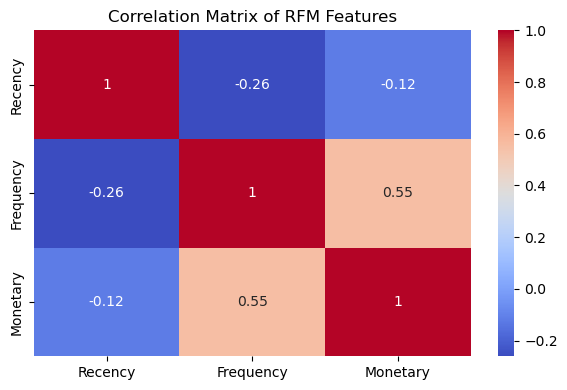

In [185]:
import seaborn as sns

# Correlation heatmap of RFM features
plt.figure(figsize=(6,4))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of RFM Features')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distributio of RFM Features')

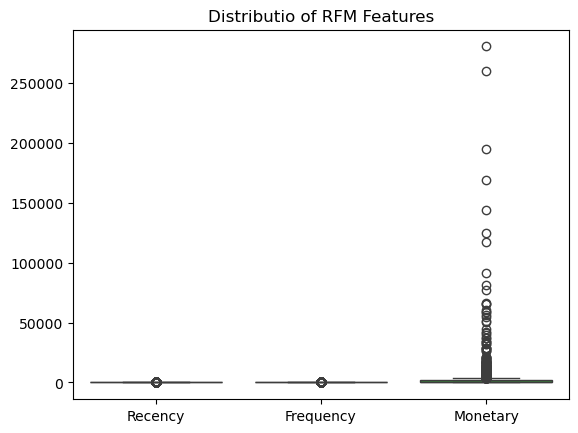

In [186]:
sns.boxplot(data=rfm[['Recency', 'Frequency', 'Monetary']])
plt.title('Distributio of RFM Features')

In [187]:
# additional business features
rfm['AvgOrderValue'] = rfm['Monetary'] / rfm['Frequency']

# joining customer info
customer_country = df.groupby('CustomerID')['Country'].first().reset_index()
rfm = pd.merge(rfm, customer_country, on='CustomerID')

rfm.head()

,CustomerID,Recency,Frequency,Monetary,AvgOrderValue,Country
0,12346.0,326,1,77183.60,77183.600000,United Kingdom
1,12347.0,2,7,4310.00,615.714286,Iceland
2,12348.0,75,4,1797.24,449.310000,Finland
3,12349.0,19,1,1757.55,1757.550000,Italy
4,12350.0,310,1,334.40,334.400000,Norway


In [188]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary,AvgOrderValue
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460,419.166289
std,1721.808492,100.014169,7.697998,8989.230441,1796.537944
min,12346.000000,1.000000,1.000000,3.750000,3.450000
25%,13813.250000,18.000000,1.000000,307.415000,178.625000
50%,15299.500000,51.000000,2.000000,674.485000,293.900000
75%,16778.750000,142.000000,5.000000,1661.740000,430.113750
max,18287.000000,374.000000,209.000000,280206.020000,84236.250000


# Clustering for customer segmentation

The goal is to group similar customers using **unsupervised ML**

With RFM scores ready, I standardized them and used KMeans Clustering to segment customers. I used the Elbow Method to determine the optimal number of clusters and settled on 5 segments.

Each cluster represented a different customer persona

This segmentation gives businesses the ability to target customers with tailored strategies — like loyalty rewards for top buyers, or re-engagement campaigns for inactive users.

In [189]:
# Scale RFM, Applying standardscaler/ Z-score normalization

from sklearn.preprocessing import StandardScaler

X =rfm[['Recency', 'Frequency','Monetary']] #selecting features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [190]:
# K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Evaluate multiple K values
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    print(f"k={k}, Silhouette Score={silhouette_score(X_scaled, labels):.4f}")

k=2, Silhouette Score=0.5604
k=3, Silhouette Score=0.5853
k=4, Silhouette Score=0.6162
k=5, Silhouette Score=0.6171
k=6, Silhouette Score=0.5983
k=7, Silhouette Score=0.5172
k=8, Silhouette Score=0.4909
k=9, Silhouette Score=0.4840


In [191]:
# choosing the best k, k=5
kmeans = KMeans(n_clusters=5, random_state = 42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,AvgOrderValue,Country,Cluster
0,12346.0,326,1,77183.60,77183.600000,United Kingdom,3
1,12347.0,2,7,4310.00,615.714286,Iceland,0
2,12348.0,75,4,1797.24,449.310000,Finland,0
3,12349.0,19,1,1757.55,1757.550000,Italy,0
4,12350.0,310,1,334.40,334.400000,Norway,1


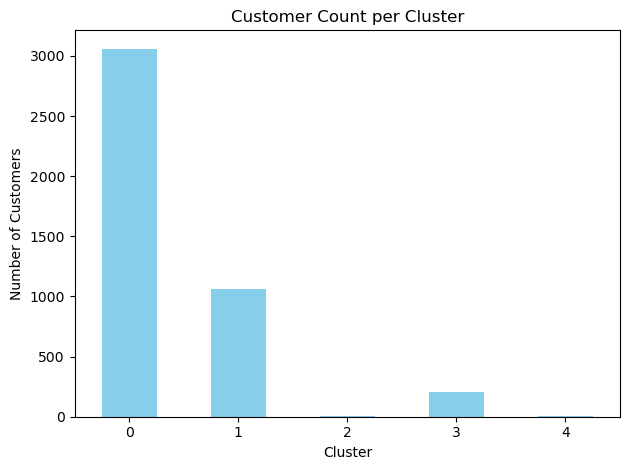

In [192]:
# Customer count by cluster
rfm['Cluster'] = rfm['Cluster'].astype(int)  # just to be safe
rfm['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Customer Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_18524\1363329918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm, x='Cluster', y='Monetary', palette='Set2')


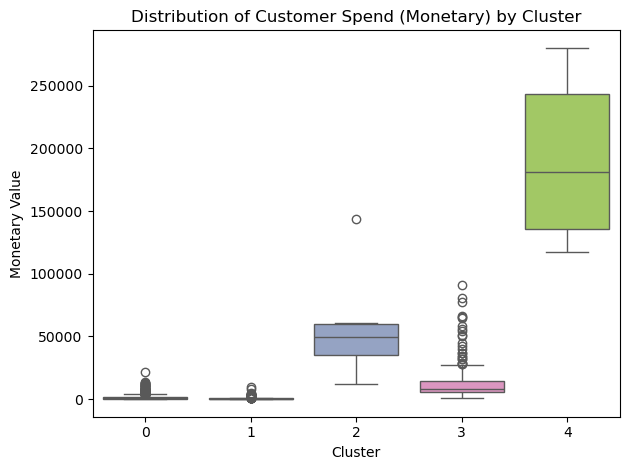

In [193]:
# Distribution of spend by cluster
sns.boxplot(data=rfm, x='Cluster', y='Monetary', palette='Set2')
plt.title('Distribution of Customer Spend (Monetary) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary Value')
plt.tight_layout()
plt.show()

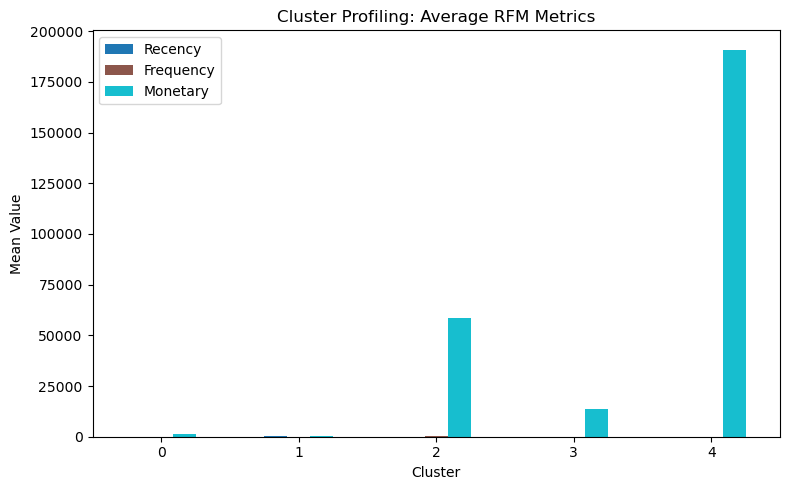

In [194]:
# Mean RFM values per cluster
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

cluster_profile.plot(kind='bar', figsize=(8,5), colormap='tab10')
plt.title('Cluster Profiling: Average RFM Metrics')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'PCA 2')

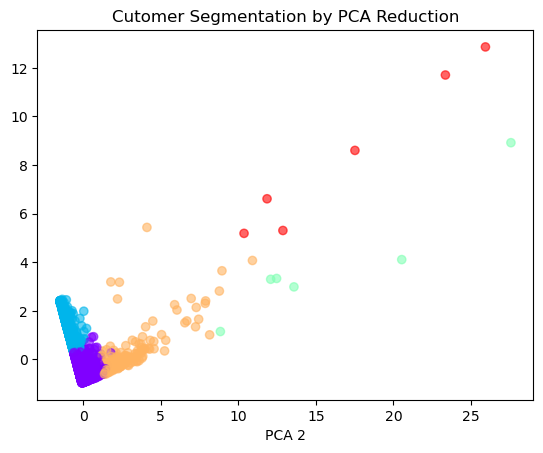

In [195]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced_features = pca.fit_transform(X_scaled)
plt.figure(figure=(8,6))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=rfm['Cluster'], cmap='rainbow', alpha=0.6)
plt.title('Customer Segments by PCA Reduction')
plt.title('Cutomer Segmentation by PCA Reduction')
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')

In [196]:
# understanding what each cluster means in business terms

rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,43.808170,3.686928,1358.774086
1,248.469426,1.553151,480.423604
2,1.500000,135.833333,58381.123333
3,15.724138,22.300493,13533.997044
4,7.666667,42.833333,190863.461667


In [197]:
# Mapping segments
segment_map = {
    0: "Loyal Low Spenders",
    1: "At Risk / Churned",
    2: "High Value Champions",
    3: "Loyal Customers",
    4: "VIP Customers"
}

rfm['Segment'] = rfm['Cluster'].map(segment_map)
rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary','Cluster', 'Segment']].head()


,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,326,1,77183.60,3,Loyal Customers
1,12347.0,2,7,4310.00,0,Loyal Low Spenders
2,12348.0,75,4,1797.24,0,Loyal Low Spenders
3,12349.0,19,1,1757.55,0,Loyal Low Spenders
4,12350.0,310,1,334.40,1,At Risk / Churned


# Predictive Modeliing - Spend Prediction(Regression)

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

features = ['Recency', 'Frequency','AvgOrderValue']
X = rfm[features]
y = rfm['Monetary']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.3244134667251972
RMSE: 8659.625046953863


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0.5, 1.0, 'Actual vs Predicted Customer Spend')

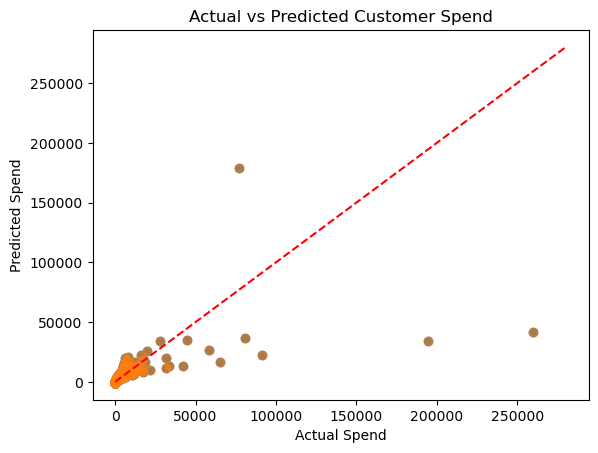

In [199]:
# spend prediction
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Spend")
plt.ylabel('Predicted Spend')
plt.title("Spend Prediction Regression")

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Spend")
plt.ylabel("Predicted Spend")
plt.title("Actual vs Predicted Customer Spend")

<Axes: title={'center': 'Revenue by Segment'}, ylabel='Segment'>

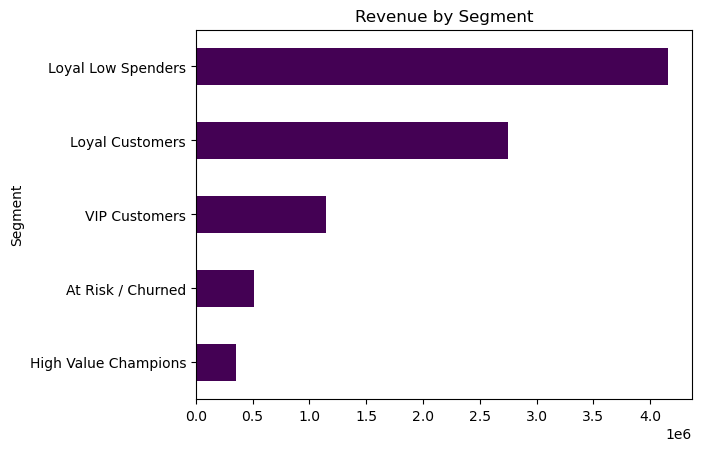

In [200]:
segment_revenue = rfm.groupby('Segment')['Monetary'].sum().sort_values()
segment_revenue.plot(kind='barh', title='Revenue by Segment', colormap='viridis')

In [201]:
# which variables influence spending
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coef_df)

         Feature  Coefficient
0        Recency     1.576040
1      Frequency   557.595731
2  AvgOrderValue     2.319233


In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Define features and target from rfm
features = ['Recency', 'Frequency', 'AvgOrderValue']
X = rfm[features]
y = rfm['Monetary']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_scaled, y)

# Display coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coef_df)

         Feature  Coefficient
0        Recency   196.476375
1      Frequency  4961.891822
2  AvgOrderValue  3442.133145


In [203]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_scaled)
print(f"R² Score: {r2_score(y, y_pred):.2f}")

R² Score: 0.45


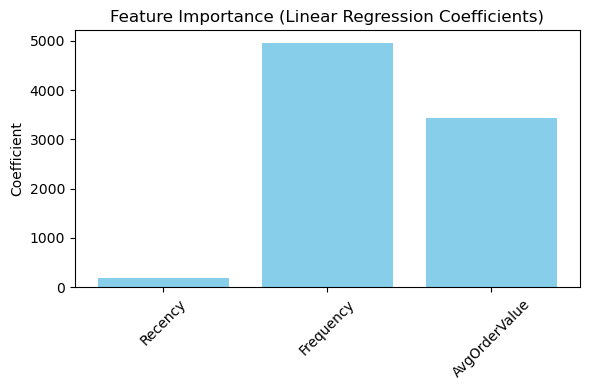

In [204]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The findings suggest several business strategies:

- Focus marketing budget on top two customer segments for maximum ROI.

- Offer incentives to medium-spending loyal customers to boost their value.

- Re-target customers who haven’t purchased recently with discounts or reminders.